<a href="https://colab.research.google.com/github/Mahya-gh/Persian-Characters-Recognition/blob/main/main_CNNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


----------------------------------------------------------------------------------------------------

In [59]:
import os
import tensorflow as tf
import keras
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [60]:
%cd /content

/content


In [61]:
%pwd

'/content'

In [62]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OhaXBuHWLzwK4i1rCxMs")
project = rf.workspace("datasetyolov5-2k886").project("plate-alpha")
dataset = project.version(6).download("folder")

loading Roboflow workspace...
loading Roboflow project...


In [63]:


train_path = '/content/plate-alpha-6/train'
valid_path = '/content/plate-alpha-6/valid'
test_path = '/content/plate-alpha-6/test'



In [64]:


class_names = subdirs = ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine','43-anewfive']
num_classes = len(class_names)
print(len(class_names))


43


In [65]:


labels_nums = [i for i in range(0,len(class_names))]
print(labels_nums)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


In [66]:


train_imgs = []
train_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(train_path, subdir)
  for imgname in os.listdir(imgfolder):
    img = cv.imread(os.path.join(imgfolder, imgname), 0)
    train_imgs.append(img)
    train_labels.append(labels_nums[indx])

c = list(zip(train_imgs, train_labels))
random.shuffle(c)
train_imgs, train_labels = zip(*c)

train_images = np.array(train_imgs)
train_labels = np.array(train_labels)



In [67]:
valid_imgs = []
valid_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(valid_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      valid_imgs.append(img)
      valid_labels.append(labels_nums[indx])

c = list(zip(valid_imgs, valid_labels))
random.shuffle(c)
valid_imgs, valid_labels = zip(*c)

test_images = np.array(valid_imgs)
test_labels = np.array(valid_labels)

26-g
25


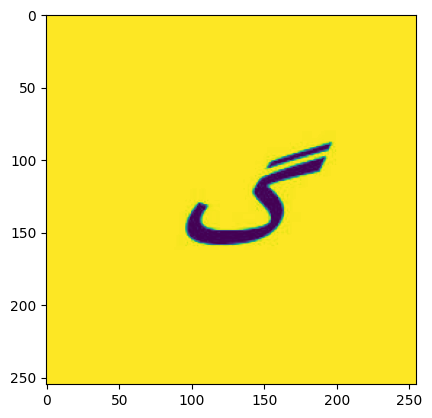

In [68]:


num=90
print(class_names[train_labels[num]])
print(train_labels[num])
plt.imshow(train_images[num])



In [69]:
test_labels

array([13, 15, 21, 12, 17, 16, 17, 10,  9, 22,  9, 19,  1,  9, 15, 10, 13,
       21, 15, 10, 17, 20, 18, 13, 20, 10,  9, 16, 16, 19, 18, 21, 10,  1,
       19, 13, 13, 13, 16,  0, 13,  1, 19,  1,  1, 12, 17,  9, 16,  9, 14,
       14, 12,  9, 13, 10, 22, 16, 10, 14, 21, 14, 18,  9, 11, 13, 17, 19,
        9, 21, 11, 13, 11, 10, 11, 18, 16, 18, 22, 15, 11, 22, 15, 17, 16,
       11, 18, 11, 17,  0, 19, 21, 14, 22, 16, 20, 19,  1, 22, 11, 19,  1,
       13, 12, 20, 17,  1, 14, 21])

In [70]:


#Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0



In [71]:
model = keras.Sequential([
    keras.layers.Input(shape=(255, 255)), # Change input shape to (255, 255)
    keras.layers.Dropout(0.12),
    keras.layers.BatchNormalization(),


    # Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into
    # a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [72]:


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [73]:


model.fit(train_images, train_labels, epochs=480)



Epoch 1/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 348ms/step - accuracy: 0.2883 - loss: 3.0950
Epoch 2/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 38s 296ms/step - accuracy: 0.5818 - loss: 1.6747
Epoch 3/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.6514 - loss: 1.2873
Epoch 4/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.6628 - loss: 1.1382
Epoch 5/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.7262 - loss: 0.8800
Epoch 6/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.7201 - loss: 0.8401
Epoch 7/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.7685 - loss: 0.6994
Epoch 8/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.7977 - loss: 0.6381
Epoch 9/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.7929 - loss: 0.6515
Epoch 10/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.8074 - loss: 0.5326
Epoch 11/480
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 223ms/step - accuracy: 0.8270 - loss: 0.5102
Epoch 12/480
61/61 ━━━━━━━━━━━

In [78]:
model.save('/content/drive/MyDrive/saved_models/new.keras') # Added the .keras extension to the filepath

In [79]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7264 - loss: 10.8661
Test accuracy: 0.7247706651687622
Test loss: 12.085453987121582


In [83]:
import tensorflow as tf # make sure to import tensorflow

ocr_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/new.keras', custom_objects={'softmax_v2': tf.nn.softmax}) # provide the definition of softmax_v2 in custom_objects

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Text(95.72222222222221, 0.5, 'Truth')

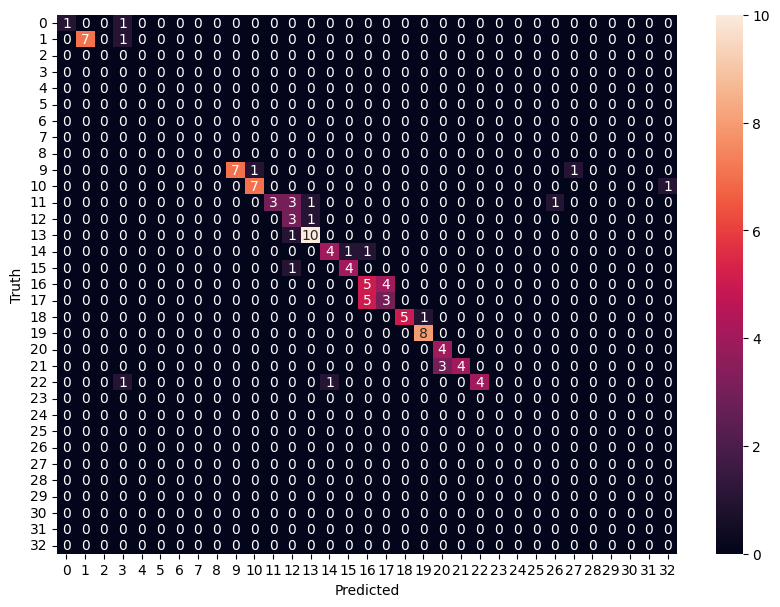

In [84]:


y_predicted = ocr_model.predict(test_images)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')




In [85]:
predictions = ocr_model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [88]:
import numpy as np

np.array([10, 15,  9, 16, 13, 21, 13, 19, 21, 11, 17, 13,  0, 14, 17,  9, 13,
       19, 13, 22, 10, 18, 13, 19, 13,  1,  1, 12, 21, 12, 12, 19, 18, 13,
       13, 18, 17, 16, 21, 16, 11, 16,  9, 22, 16, 14,  9, 22, 11, 18, 13,
       21, 15, 14, 15,  9, 13,  1, 17, 10,  1, 14, 19, 20, 20, 15, 10, 18,
       17, 17,  1, 17, 14, 17, 10,  9, 16,  0, 10, 19, 20, 11, 21, 22, 21,
       12,  9, 11,  1,  9, 14, 22, 10, 11,  1, 10, 19, 16,  9, 16, 19, 20,
       22, 11, 18, 16, 15, 11,  1])


for v,l in enumerate(predictions[:5]):
    print(v,np.argmax(l))



0 13
1 15
2 21
3 12
4 17


In [89]:
for v,l in enumerate(predictions[:5]):
    print(v,class_names[np.argmax(l)])

0 14-zh
1 16-shin
2 22-ghyin
3 13-z
4 18-zad


In [93]:
import cv2 as cv
import numpy as np

test_img_path = "/content/drive/MyDrive/plate2.jpg"
test_img = cv.imread(test_img_path, 0)
# Resize the image to match the input shape of the model
test_img = cv.resize(test_img, (255, 255)) # Assuming 255x255 is the correct input shape
test_img = np.expand_dims(test_img, axis=0)
prediction1 = ocr_model.predict(test_img)

class_names[np.argmax(prediction1[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


'10-d'